# Workers productivity

Contenido:
- Analisis de datos de la productividad de trabajadores.
- Modelo predictivo de la productividad de los trabajadores.

Importamos librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")



from sklearn.metrics import accuracy_score, confusion_matrix,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error


Leemos nuestros datos

In [2]:
df = pd.read_csv('garments_worker_productivity.csv')

Atributos del dataset:
1. **date**: Date in MM-DD-YYYY
3. **quarter**: A portion of the month. A month was divided into four quarters
4. **department**: Associated department with the instance
2. **day**: Day of the Week
5. **team**: Associated team number with the instance
8. **targeted_productivity**: Targeted productivity set by the Authority for each team for each day.
9. **smv**: Standard Minute Value, it is the allocated time for a task 
10. **wip**: Work in progress. Includes the number of unfinished items for products 
11. **over_time**: Represents the amount of overtime by each team in minutes
12. **incentive**: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13. **idle_time**: The amount of time when the production was interrupted due to several reasons 
14. **idle_men**: The number of workers who were idle due to production interruption
7. **no_of_style_change**: Number of changes in the style of a particular product
6. **no_of_workers**: Number of workers in each team 
15. **actual_productivity**: The actual % of productivity that was delivered by the workers. It ranges from 0-1.

Veamos los tipos de departamentos

In [3]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

Aquí podemos ver que un espacio divide en dos categorías diferentes a "finishing". Ahora vamos a fusionarlas.

In [4]:
df['department'] = df['department'].apply(lambda x: 'finishing' if x.replace(" ","") == 'finishing' else 'sewing' )

Podemos ver que ahora ya tenemos los departamentos correctos

<AxesSubplot: ylabel='department'>

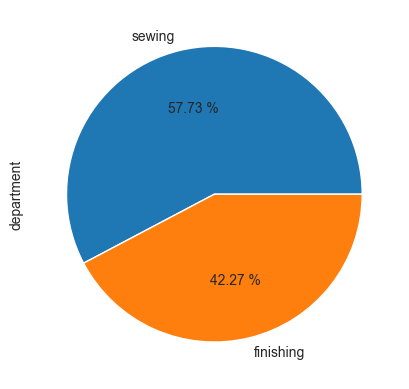

In [5]:
df.department.value_counts().plot.pie(autopct='%.2f %%')

### Conociendo mas el dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [7]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Podemos ver que hay 506 nulos en la columna de "wip"

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


### Saquemos algunas graficas

Comparemos la productividad real y la productividad objetivo para ver el rendimiento de los empleados.

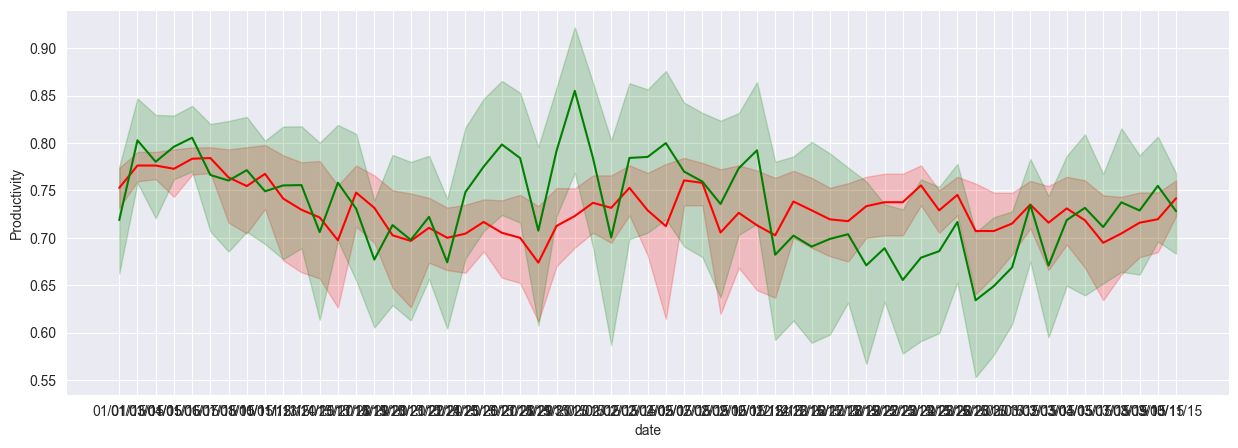

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
ax=sns.lineplot(y='targeted_productivity',x='date' ,color = "red", data =df,legend='brief')
ax=sns.lineplot(y= 'actual_productivity',x='date',data=df, color="green", legend = 'brief')
ax.set(ylabel = 'Productivity')
plt.show()

Ahora analicemos si el día concreto de la semana o el equipo o el departamento tiene algún efecto significativo en la productividad.

Productividad en Thursday :  0.7226408815326634
Productividad en Saturday :  0.7519288593743317
Productividad en Sunday :  0.7286041288078818
Productividad en Monday :  0.7354884994170856
Productividad en Tuesday :  0.742700917676617
Productividad en Wednesday :  0.7304619085144229


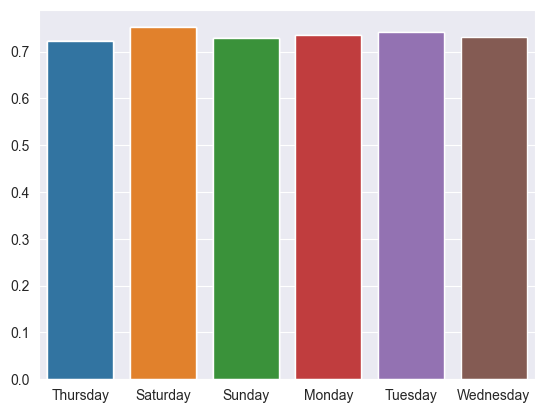

In [10]:
l = []
l1=[]
column_name = "day"
for i in list(df[column_name].unique()):
    print( f"Productividad en {i} : ",df[df[column_name] == i]["actual_productivity"].mean())
    l.append(df[df[column_name] == i]["actual_productivity"].mean())
    l1.append(i)
    dictionary = {"data":l,"keys":l1}
    sns.barplot( x = "keys" , y = "data", data = dictionary)
# plt.savefig('days.png')

Como podemos ver arriba, la productividad no depende del equipo, la categoría, el trimestre o el día.

Vamos a trazar la matriz de correlación para ver la cantidad de correlación -

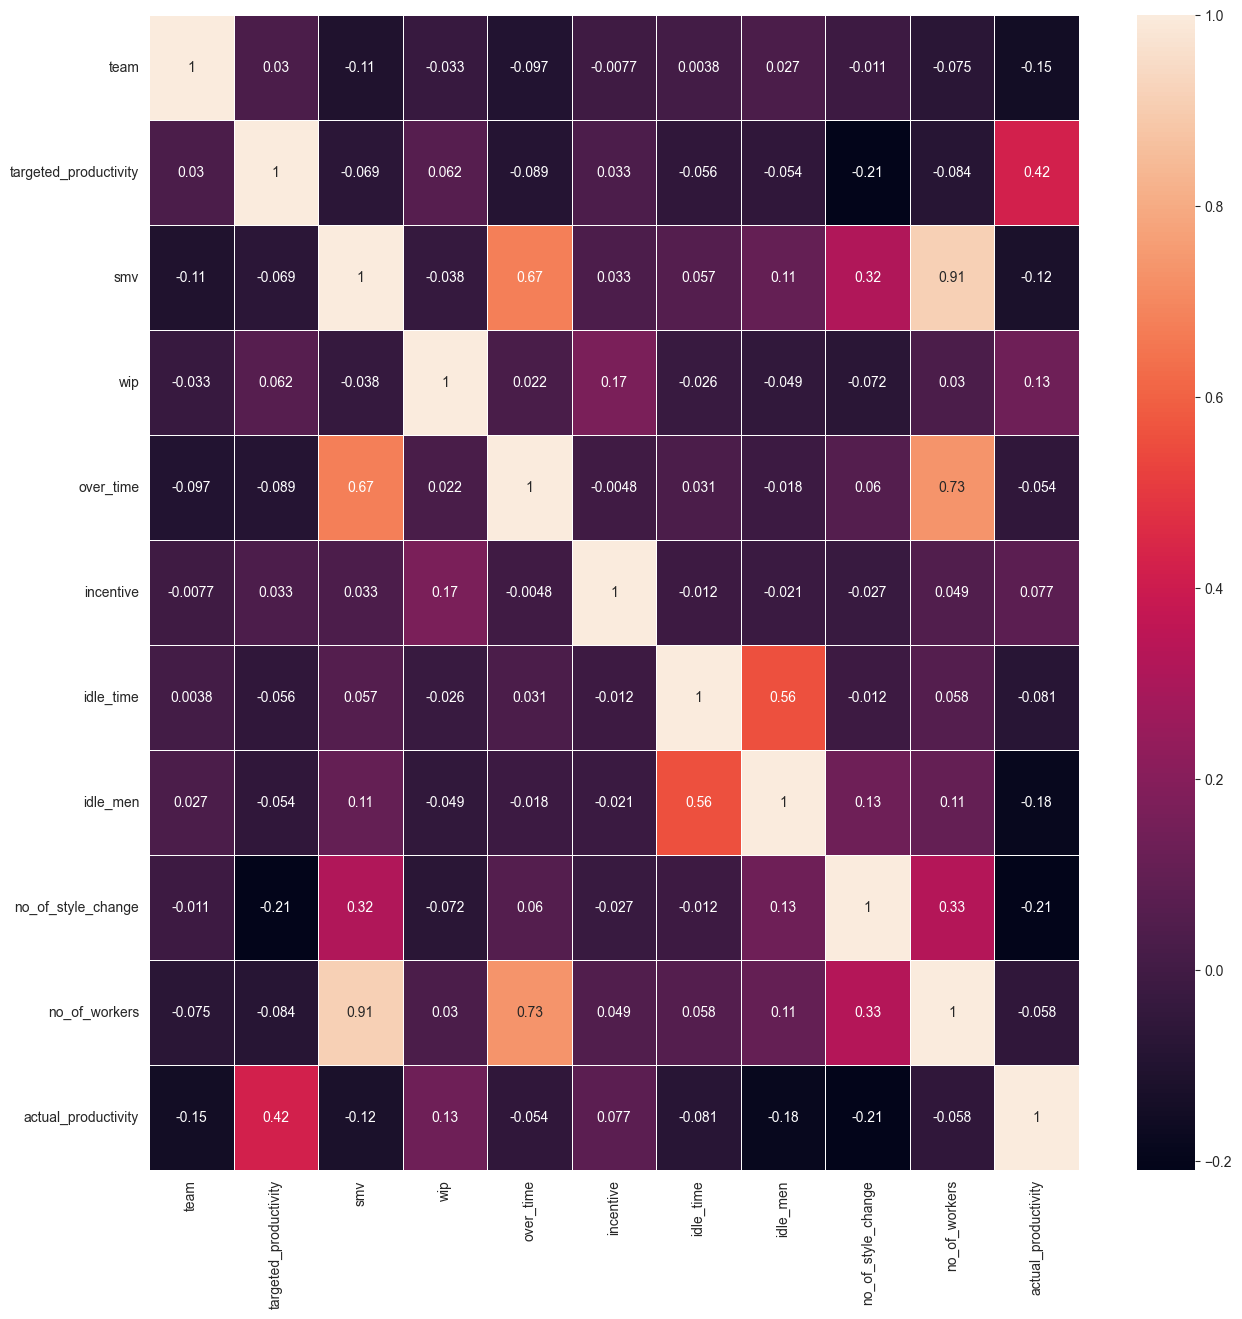

In [11]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15)) # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

So from these data, it is quite evident productivity mainly depends on the target productivity as having a target will motivate and boost the employees.

## Let’s Prepare the final data and start the prediction.

#### Hagamos una limpieza y un preprocesamiento de los datos antes de pasar a la predicción

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df.date

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

Así que los datos que tenemos son de 3 meses. 
Optamos por dejar el dia ya que como son pocos meses es suficiente en lugar de la fecha completa.

In [14]:
df['Dia']=df['date'].dt.day
df.drop(['date'],axis=1, inplace=True)

Optamos por llenar los wip faltantes por la media de la misma

In [15]:
df['wip'].fillna(int(df['wip'].mean()), inplace=True)

In [16]:
df.isnull().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
Dia                      0
dtype: int64

Ahora podemos ver que no tenemos datos faltantes

### Encode

En los datos, puedes ver algunas columnas no numéricas. Así que vamos a codificarlas, ya que la mayoría de los algoritmos de aprendizaje automático sólo funcionan con datos numéricos.

Let’s encode the data with MultiColumnLabelEncoder

In [17]:
#!pip install MultiColumnLabelEncoder

In [18]:
import MultiColumnLabelEncoder

In [19]:
Mcle = MultiColumnLabelEncoder.MultiColumnLabelEncoder()
df = Mcle.fit_transform(df)

In [20]:
x=df.drop(['actual_productivity'],axis=1)
y=df['actual_productivity']

### Prediciendo la productividad

Antes de tratar de predecir, vamos a preparar los datos de entrenamiento y de prueba

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8,random_state=0)

Los algoritmos que implementaremos para ver cual se adapta mejor a los datos son los siguientes:

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

Funcion para ver que tan bien funcionan los algiritmos con nuestros datos.

In [23]:
def impresionResultados(y_test, pred6):
    print("test_MSE:",mean_squared_error(y_test, pred6))
    print("test_MAE:",mean_absolute_error(y_test, pred6))
    print("R2_score:{}".format(r2_score(y_test, pred6)))

- LinearRegression

In [24]:
model_lr=LinearRegression()

model_lr.fit(x_train,y_train)
pred_test=model_lr.predict(x_test)
impresionResultados(y_test, pred_test)

test_MSE: 0.02055089837900794
test_MAE: 0.10393316887168881
R2_score:0.3049109897581115


- Random Forest Regressor

In [25]:
model_rfe = RandomForestRegressor(n_estimators=200,max_depth=5)

model_rfe.fit(x_train, y_train)
pred = model_rfe.predict(x_test)
impresionResultados(y_test, pred)

test_MSE: 0.015197950406628321
test_MAE: 0.08513113706114192
R2_score:0.4859627004608573


- XGBoost

In [26]:
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)

model_xgb.fit(x_train, y_train)
pred3=model_xgb.predict(x_test)
impresionResultados(y_test, pred3)

test_MSE: 0.01374790811694625
test_MAE: 0.07617489714926058
R2_score:0.53500719678193


- SVR

In [27]:
model_svr = SVR(kernel='rbf', C=10, epsilon=0.00001) # set kernel and hyperparameters

svr = model_svr.fit(x_train, y_train)
pred4 = model_svr.predict(x_test)
impresionResultados(y_test, pred4)

test_MSE: 0.026459445509063834
test_MAE: 0.11576166517248991
R2_score:0.10506735757932395


- Lasso

In [28]:
las_reg = Lasso()

las_reg.fit(x_train, y_train)
pred5 = las_reg.predict(x_test)
impresionResultados(y_test, pred5)

test_MSE: 0.029032698375057873
test_MAE: 0.12988811271294887
R2_score:0.01803272995677041


- Ridge

In [29]:
rid_reg = Ridge()

rid_reg.fit(x_train, y_train)
pred6 = rid_reg.predict(x_test)
impresionResultados(y_test, pred6)

test_MSE: 0.020697487907402178
test_MAE: 0.10519098125399158
R2_score:0.29995292085405534


- Decision Tree Regressor

In [30]:
dt_regressor = DecisionTreeRegressor(random_state = 0)

dt_regressor.fit(x_train,y_train)
pred7 = dt_regressor.predict(x_test)
impresionResultados(y_test, pred7)
print("test_neg_mean_squared_log_error:",mean_squared_log_error(y_test, pred7))


test_MSE: 0.02996963200048947
test_MAE: 0.10155298398750001
R2_score:-0.013656992524112788
test_neg_mean_squared_log_error: 0.011371695731650564
